With only two classes 

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
import os
import sys

# Add modules to path
sys.path.append('modules')

# Import our custom utilities
from data_utils import  create_data_loaders, plot_training_history, plot_confusion_matrix
from model_utils import CNNBaseline, train_model, evaluate_model

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")



In [32]:
import pandas as pd
import pickle

import json
def load_processed_data_v2():
    """Load preprocessed data ---   V2"""
    
    # Load dataframes
    train_df = pd.read_csv('processed_data_v2/train_df.csv')
    val_df = pd.read_csv('processed_data_v2/val_df.csv')
    test_df = pd.read_csv('processed_data_v2/test_df.csv')
    
    # Load label encoder
    with open('processed_data_v2/label_encoder.pkl', 'rb') as f:
        label_encoder = pickle.load(f)
    
    # Load preprocessing config
    with open('processed_data_v2/preprocessing_config.json', 'r') as f:
        config = json.load(f)
    
    return train_df, val_df, test_df, label_encoder, config

In [33]:
## Load processed data is modified 
train_df, val_df, test_df, label_encoder, config = load_processed_data_v2()

print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")
print(f"Test samples: {len(test_df)}")
print(f"Number of classes: {config['num_classes']}")
print(f"Class names: {config['class_names']}")
print(f"Label encoder classes: {label_encoder.classes_}")

# Create data loaders
train_loader, val_loader, test_loader = create_data_loaders(
    train_df, val_df, test_df, batch_size=config['batch_size']
)

print(f"Training batches: {len(train_loader)}")
print(f"Validation batches: {len(val_loader)}")
print(f"Test batches: {len(test_loader)}")
print(f"Batch size: {config['batch_size']}")


Training samples: 945
Validation samples: 315
Test samples: 315
Number of classes: 2
Class names: ['ACK', 'BCC']
Label encoder classes: ['ACK' 'BCC']
Training batches: 30
Validation batches: 10
Test batches: 10
Batch size: 32


In [34]:
for images, targets, metadata in train_loader:
    print(f"Batch test successful:")
    print(f"Images shape: {images.shape}")
    print(f"Targets type: {type(targets)}, length: {len(targets)}")
    print(f"Sample targets: {targets[:3]}")
    print(f"Metadata type: {type(metadata)}")
    print(f"Metadata length: {len(metadata)}")
    break


Batch test successful:
Images shape: torch.Size([32, 3, 224, 224])
Targets type: <class 'list'>, length: 32
Sample targets: ['BCC', 'BCC', 'ACK']
Metadata type: <class 'list'>
Metadata length: 32


In [35]:
# Setup device and model configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Create models directory
os.makedirs('models', exist_ok=True)

# Model configurations to test
model_configs = [
    {'name': 'resnet50_v2', 'model_name': 'resnet50_v2', 'pretrained': True}
]
# Training parameters
training_params = {
    'num_epochs': 50,
    'learning_rate': 0.001,
    'patience': 10
}

for key, value in training_params.items():
    print(f"{key}: {value}")


Using device: cuda
num_epochs: 50
learning_rate: 0.001
patience: 10


In [36]:
# Create ResNet-34 model
resnet_model = CNNBaseline(
    num_classes=2,    # only 2 classes exist now
    model_name='resnet34',
    pretrained=True
)

print(f"ResNet-34 model created:")
print(f"Parameters: {sum(p.numel() for p in resnet_model.parameters()):,}")
print(f"Trainable parameters: {sum(p.numel() for p in resnet_model.parameters() if p.requires_grad):,}")

ResNet-34 model created:
Parameters: 21,285,698
Trainable parameters: 1,026


In [37]:
# Train the model
resnet_history = train_model(
    model=resnet_model,
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=training_params['num_epochs'],
    learning_rate=training_params['learning_rate'],
    device='cuda',
    patience=training_params['patience'],
    model_name='resnet34_baseline_v2',
    label_encoder=label_encoder 
)



Device available: True
Device: cuda
Starting training for 50 epochs...
Device: cuda
Model: resnet34
Parameters: 21,285,698


Epoch 1/50 [Val]: 100%|██████████| 10/10 [00:12<00:00,  1.30s/it, Loss=0.9287, Acc=56.83%]


Epoch 1/50:
Train Loss: 0.6572, Train Acc: 61.48%
Val Loss: 0.8096, Val Acc: 56.83%
LR: 0.000999
New best model saved! Val Acc: 56.83%


Epoch 2/50 [Val]: 100%|██████████| 10/10 [00:14<00:00,  1.41s/it, Loss=0.7965, Acc=61.59%]


Epoch 2/50:
Train Loss: 0.5920, Train Acc: 67.83%
Val Loss: 0.7162, Val Acc: 61.59%
LR: 0.000996
New best model saved! Val Acc: 61.59%


Epoch 3/50 [Val]: 100%|██████████| 10/10 [00:13<00:00,  1.32s/it, Loss=0.6975, Acc=65.08%]


Epoch 3/50:
Train Loss: 0.5603, Train Acc: 71.64%
Val Loss: 0.6367, Val Acc: 65.08%
LR: 0.000991
New best model saved! Val Acc: 65.08%


Epoch 4/50 [Val]: 100%|██████████| 10/10 [00:12<00:00,  1.29s/it, Loss=0.7989, Acc=62.54%]


Epoch 4/50:
Train Loss: 0.5527, Train Acc: 71.53%
Val Loss: 0.7065, Val Acc: 62.54%
LR: 0.000984


Epoch 5/50 [Val]: 100%|██████████| 10/10 [00:16<00:00,  1.62s/it, Loss=0.7243, Acc=65.71%]


Epoch 5/50:
Train Loss: 0.5364, Train Acc: 73.23%
Val Loss: 0.6542, Val Acc: 65.71%
LR: 0.000976
New best model saved! Val Acc: 65.71%


Epoch 6/50 [Val]: 100%|██████████| 10/10 [00:12<00:00,  1.27s/it, Loss=0.6425, Acc=71.11%]


Epoch 6/50:
Train Loss: 0.5382, Train Acc: 73.44%
Val Loss: 0.5830, Val Acc: 71.11%
LR: 0.000965
New best model saved! Val Acc: 71.11%


Epoch 7/50 [Val]: 100%|██████████| 10/10 [00:12<00:00,  1.26s/it, Loss=0.7677, Acc=63.81%]


Epoch 7/50:
Train Loss: 0.5269, Train Acc: 74.92%
Val Loss: 0.7135, Val Acc: 63.81%
LR: 0.000952


Epoch 8/50 [Val]: 100%|██████████| 10/10 [00:12<00:00,  1.22s/it, Loss=0.5667, Acc=73.65%]


Epoch 8/50:
Train Loss: 0.4979, Train Acc: 75.66%
Val Loss: 0.5184, Val Acc: 73.65%
LR: 0.000938
New best model saved! Val Acc: 73.65%


Epoch 9/50 [Val]: 100%|██████████| 10/10 [00:12<00:00,  1.26s/it, Loss=0.8052, Acc=64.13%]


Epoch 9/50:
Train Loss: 0.5178, Train Acc: 74.92%
Val Loss: 0.7418, Val Acc: 64.13%
LR: 0.000922


Epoch 10/50 [Val]: 100%|██████████| 10/10 [00:12<00:00,  1.27s/it, Loss=0.6529, Acc=69.84%]


Epoch 10/50:
Train Loss: 0.4938, Train Acc: 76.83%
Val Loss: 0.6018, Val Acc: 69.84%
LR: 0.000905


Epoch 11/50 [Val]: 100%|██████████| 10/10 [00:16<00:00,  1.70s/it, Loss=0.6853, Acc=70.48%]


Epoch 11/50:
Train Loss: 0.5092, Train Acc: 74.60%
Val Loss: 0.6055, Val Acc: 70.48%
LR: 0.000885


Epoch 12/50 [Val]: 100%|██████████| 10/10 [00:12<00:00,  1.27s/it, Loss=0.5826, Acc=73.65%]


Epoch 12/50:
Train Loss: 0.5152, Train Acc: 74.71%
Val Loss: 0.5271, Val Acc: 73.65%
LR: 0.000864


Epoch 13/50 [Val]: 100%|██████████| 10/10 [00:13<00:00,  1.31s/it, Loss=0.6067, Acc=74.29%]


Epoch 13/50:
Train Loss: 0.4943, Train Acc: 76.83%
Val Loss: 0.5427, Val Acc: 74.29%
LR: 0.000842
New best model saved! Val Acc: 74.29%


Epoch 14/50 [Val]: 100%|██████████| 10/10 [00:12<00:00,  1.28s/it, Loss=0.7854, Acc=66.98%]


Epoch 14/50:
Train Loss: 0.4927, Train Acc: 75.34%
Val Loss: 0.7253, Val Acc: 66.98%
LR: 0.000819


Epoch 15/50 [Val]: 100%|██████████| 10/10 [00:12<00:00,  1.23s/it, Loss=0.6050, Acc=72.38%]


Epoch 15/50:
Train Loss: 0.4960, Train Acc: 75.98%
Val Loss: 0.5616, Val Acc: 72.38%
LR: 0.000794


Epoch 16/50 [Val]: 100%|██████████| 10/10 [00:12<00:00,  1.24s/it, Loss=0.7487, Acc=68.89%]


Epoch 16/50:
Train Loss: 0.5024, Train Acc: 75.24%
Val Loss: 0.6927, Val Acc: 68.89%
LR: 0.000768


Epoch 17/50 [Val]: 100%|██████████| 10/10 [00:12<00:00,  1.26s/it, Loss=0.5724, Acc=77.46%]


Epoch 17/50:
Train Loss: 0.5034, Train Acc: 76.51%
Val Loss: 0.5131, Val Acc: 77.46%
LR: 0.000741
New best model saved! Val Acc: 77.46%


Epoch 18/50 [Val]: 100%|██████████| 10/10 [00:12<00:00,  1.25s/it, Loss=0.7092, Acc=68.89%]


Epoch 18/50:
Train Loss: 0.5258, Train Acc: 73.97%
Val Loss: 0.6594, Val Acc: 68.89%
LR: 0.000713


Epoch 19/50 [Val]: 100%|██████████| 10/10 [00:12<00:00,  1.24s/it, Loss=0.6018, Acc=76.19%]


Epoch 19/50:
Train Loss: 0.4757, Train Acc: 78.62%
Val Loss: 0.5299, Val Acc: 76.19%
LR: 0.000684


Epoch 20/50 [Val]: 100%|██████████| 10/10 [00:12<00:00,  1.25s/it, Loss=0.6156, Acc=73.33%]


Epoch 20/50:
Train Loss: 0.4805, Train Acc: 78.84%
Val Loss: 0.5690, Val Acc: 73.33%
LR: 0.000655


Epoch 21/50 [Val]: 100%|██████████| 10/10 [00:12<00:00,  1.23s/it, Loss=0.6473, Acc=73.33%]


Epoch 21/50:
Train Loss: 0.4681, Train Acc: 79.05%
Val Loss: 0.5881, Val Acc: 73.33%
LR: 0.000624


Epoch 22/50 [Val]: 100%|██████████| 10/10 [00:12<00:00,  1.23s/it, Loss=0.6809, Acc=71.11%]


Epoch 22/50:
Train Loss: 0.4757, Train Acc: 76.61%
Val Loss: 0.6370, Val Acc: 71.11%
LR: 0.000594


Epoch 23/50 [Val]: 100%|██████████| 10/10 [00:12<00:00,  1.25s/it, Loss=0.6019, Acc=72.70%]


Epoch 23/50:
Train Loss: 0.4939, Train Acc: 76.51%
Val Loss: 0.5817, Val Acc: 72.70%
LR: 0.000563


Epoch 24/50 [Val]: 100%|██████████| 10/10 [00:12<00:00,  1.26s/it, Loss=0.5705, Acc=75.24%]


Epoch 24/50:
Train Loss: 0.4995, Train Acc: 76.19%
Val Loss: 0.5173, Val Acc: 75.24%
LR: 0.000531


Epoch 25/50 [Val]: 100%|██████████| 10/10 [00:12<00:00,  1.23s/it, Loss=0.6497, Acc=71.43%]


Epoch 25/50:
Train Loss: 0.4758, Train Acc: 78.31%
Val Loss: 0.6077, Val Acc: 71.43%
LR: 0.000500


Epoch 26/50 [Val]: 100%|██████████| 10/10 [00:12<00:00,  1.24s/it, Loss=0.5881, Acc=74.92%]


Epoch 26/50:
Train Loss: 0.4733, Train Acc: 78.41%
Val Loss: 0.5325, Val Acc: 74.92%
LR: 0.000469


Epoch 27/50 [Val]: 100%|██████████| 10/10 [00:12<00:00,  1.25s/it, Loss=0.5764, Acc=74.60%]

Epoch 27/50:
Train Loss: 0.4845, Train Acc: 76.83%
Val Loss: 0.5310, Val Acc: 74.60%
LR: 0.000437
Early stopping triggered after 27 epochs


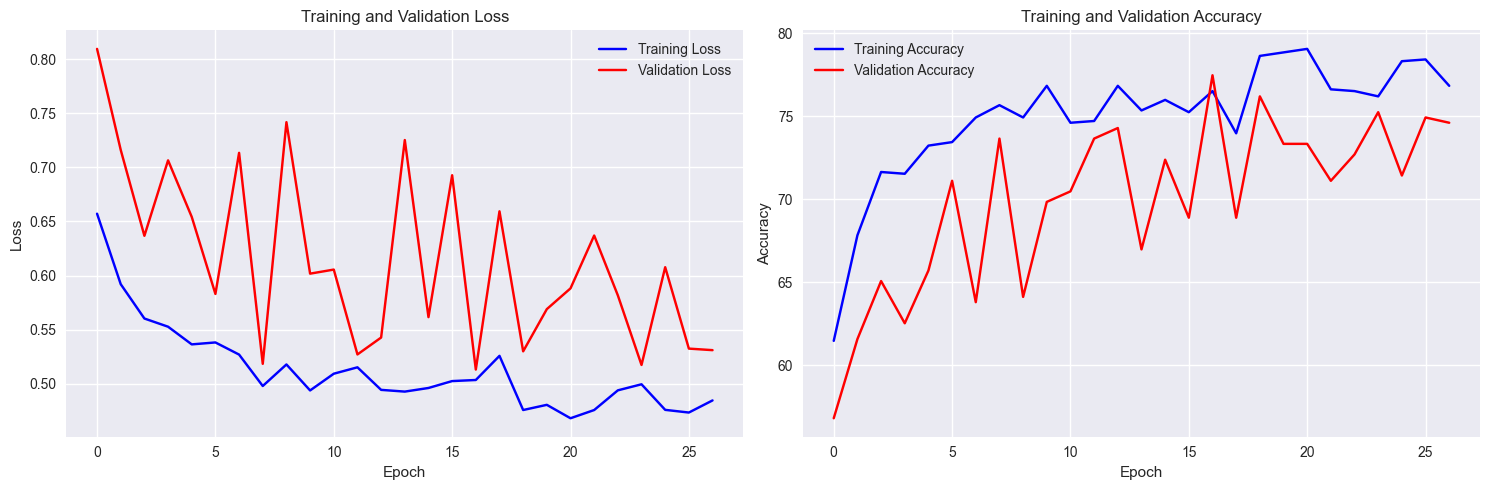

In [38]:
plot_training_history(resnet_history)

In [39]:
results = {}

model = resnet_model
model_name = 'resnet34_baseline_v2'
checkpoint_path = 'resnet34_baseline_v2_best.pth'

    
    # Load best weights
model.load_state_dict(torch.load(f'models/{checkpoint_path}', map_location=device))
    
    # Evaluate on test set
test_results = evaluate_model(
        model=model,
        test_loader=test_loader,
        device=device,
        class_names=config['class_names'],
        label_encoder=label_encoder  # Add label encoder
    )
    
results[model_name] = test_results

Evaluating model on test set...


Testing: 100%|██████████| 10/10 [00:32<00:00,  3.27s/it]

Test Results:
Accuracy: 0.7143 (71.43%)
Classification Report:
              precision    recall  f1-score   support

         ACK     0.7333    0.6027    0.6617       146
         BCC     0.7026    0.8107    0.7527       169

    accuracy                         0.7143       315
   macro avg     0.7179    0.7067    0.7072       315
weighted avg     0.7168    0.7143    0.7105       315



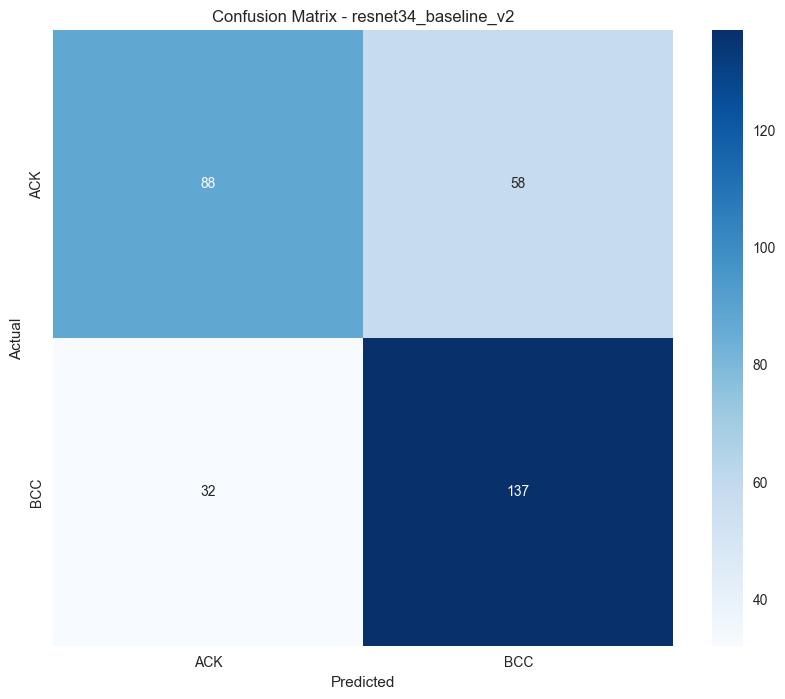

              precision    recall  f1-score   support

         ACK     0.7333    0.6027    0.6617       146
         BCC     0.7026    0.8107    0.7527       169

    accuracy                         0.7143       315
   macro avg     0.7179    0.7067    0.7072       315
weighted avg     0.7168    0.7143    0.7105       315



In [40]:
best_model_name = model_name
best_results = results[best_model_name]
y_true = best_results['targets']
y_pred = best_results['predictions']

# Plot confusion matrix
cm = plot_confusion_matrix(
    y_true, y_pred, 
    class_names=config['class_names'],
    title=f'Confusion Matrix - {best_model_name}'
)

# Print detailed classification report
report = classification_report(y_true, y_pred, target_names=config['class_names'], digits=4)
print(report)


The model still incines towards BCC. Lets use some other backbone, such as EfficientNet which is believed to generalize better to fine textures.

In [41]:
import torchvision.models as models

class EfficientNetBaseline(nn.Module):
    def __init__(self, num_classes, model_name= 'EfficientNet_Base', pretrained=True):
        super(EfficientNetBaseline, self).__init__()

        self.model_name = model_name

        # Load pretrained backbone
        if pretrained:
            self.backbone = models.efficientnet_b2(
                weights=models.EfficientNet_B2_Weights.IMAGENET1K_V1
            )
        else:
            self.backbone = models.efficientnet_b2(weights=None)

        # Unfreeze last feature blocks
        for name, param in self.backbone.named_parameters():
            if "features.6" in name or "features.7" in name:
                param.requires_grad = True
            else:
                param.requires_grad = False

        # Replace classifier
        in_features = self.backbone.classifier[1].in_features
        self.backbone.classifier[1] =  nn.Sequential(
            nn.Dropout(p=0.4),
            nn.Linear(in_features, num_classes)
        )

    def forward(self, x):
        return self.backbone(x)


In [42]:

# Create models directory
os.makedirs('models', exist_ok=True)

# Model configurations to test
model_configs = [
    {'name': 'efficient_net_base', 'model_name': 'efficient_net_base', 'pretrained': True}
]

# Training parameters
training_params = {
    'num_epochs': 50,
    'learning_rate': 0.001,
    'patience': 10
}

for key, value in training_params.items():
    print(f"{key}: {value}")

# Create ResNet-50 model
efficientNet_model = EfficientNetBaseline(
    num_classes= 2,
    pretrained=True
)

print(f"Parameters: {sum(p.numel() for p in resnet_model.parameters()):,}")
print(f"Trainable parameters: {sum(p.numel() for p in resnet_model.parameters() if p.requires_grad):,}")




num_epochs: 50
learning_rate: 0.001
patience: 10
Parameters: 21,285,698
Trainable parameters: 1,026


In [ ]:
#Train the model
efficientNet_history = train_model(
    model=efficientNet_model,
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=training_params['num_epochs'],
    learning_rate=training_params['learning_rate'],
    device='cuda',
    model_name = 'efficient_net_base',
    patience=training_params['patience'],
    label_encoder=label_encoder 
)

Device available: True
Device: cuda
Starting training for 50 epochs...
Device: cuda
Model: EfficientNet_Base
Parameters: 7,703,812


Epoch 1/50 [Val]: 100%|██████████| 10/10 [00:13<00:00,  1.36s/it, Loss=0.5573, Acc=79.37%]


Epoch 1/50:
Train Loss: 0.5625, Train Acc: 71.22%
Val Loss: 0.4949, Val Acc: 79.37%
LR: 0.000999
New best model saved! Val Acc: 79.37%


Epoch 2/50 [Val]: 100%|██████████| 10/10 [00:13<00:00,  1.35s/it, Loss=0.3858, Acc=79.68%]


Epoch 2/50:
Train Loss: 0.3686, Train Acc: 85.71%
Val Loss: 0.4395, Val Acc: 79.68%
LR: 0.000996
New best model saved! Val Acc: 79.68%


Epoch 3/50 [Val]: 100%|██████████| 10/10 [00:13<00:00,  1.31s/it, Loss=0.4643, Acc=79.68%]


Epoch 3/50:
Train Loss: 0.3090, Train Acc: 88.68%
Val Loss: 0.5010, Val Acc: 79.68%
LR: 0.000991


Epoch 4/50 [Val]: 100%|██████████| 10/10 [00:13<00:00,  1.36s/it, Loss=0.5255, Acc=81.59%]


Epoch 4/50:
Train Loss: 0.2554, Train Acc: 88.47%
Val Loss: 0.4668, Val Acc: 81.59%
LR: 0.000984
New best model saved! Val Acc: 81.59%


Epoch 5/50 [Val]: 100%|██████████| 10/10 [00:12<00:00,  1.28s/it, Loss=0.6428, Acc=80.32%]


Epoch 5/50:
Train Loss: 0.2039, Train Acc: 91.53%
Val Loss: 0.5569, Val Acc: 80.32%
LR: 0.000976


Epoch 6/50 [Val]: 100%|██████████| 10/10 [00:12<00:00,  1.28s/it, Loss=0.6090, Acc=78.10%]


Epoch 6/50:
Train Loss: 0.2028, Train Acc: 92.70%
Val Loss: 0.5393, Val Acc: 78.10%
LR: 0.000965


Epoch 7/50 [Val]: 100%|██████████| 10/10 [00:13<00:00,  1.30s/it, Loss=0.4917, Acc=79.05%]


Epoch 7/50:
Train Loss: 0.1541, Train Acc: 94.60%
Val Loss: 0.7042, Val Acc: 79.05%
LR: 0.000952


Epoch 8/50 [Val]: 100%|██████████| 10/10 [00:13<00:00,  1.32s/it, Loss=0.8425, Acc=81.27%]


Epoch 8/50:
Train Loss: 0.1660, Train Acc: 94.07%
Val Loss: 0.5823, Val Acc: 81.27%
LR: 0.000938


Epoch 9/50 [Val]: 100%|██████████| 10/10 [00:13<00:00,  1.35s/it, Loss=0.7422, Acc=82.22%]


Epoch 9/50:
Train Loss: 0.1376, Train Acc: 95.24%
Val Loss: 0.5609, Val Acc: 82.22%
LR: 0.000922
New best model saved! Val Acc: 82.22%


Epoch 10/50 [Val]: 100%|██████████| 10/10 [00:13<00:00,  1.36s/it, Loss=0.7052, Acc=81.90%]


Epoch 10/50:
Train Loss: 0.1113, Train Acc: 95.56%
Val Loss: 0.6189, Val Acc: 81.90%
LR: 0.000905


Epoch 11/50 [Val]: 100%|██████████| 10/10 [00:14<00:00,  1.47s/it, Loss=0.5722, Acc=79.68%]


Epoch 11/50:
Train Loss: 0.1557, Train Acc: 94.29%
Val Loss: 0.6107, Val Acc: 79.68%
LR: 0.000885


Epoch 12/50 [Val]: 100%|██████████| 10/10 [00:14<00:00,  1.40s/it, Loss=0.7458, Acc=83.49%]

Epoch 12/50:
Train Loss: 0.1244, Train Acc: 95.03%
Val Loss: 0.7166, Val Acc: 83.49%
LR: 0.000864
New best model saved! Val Acc: 83.49%
Early stopping triggered after 12 epochs


In [44]:
results = {}

model = efficientNet_model
model_name = 'efficient_net_base'
checkpoint_path = 'efficient_net_base_best.pth'

    
    # Load best weights
model.load_state_dict(torch.load(f'models/{checkpoint_path}', map_location=device))
    
    # Evaluate on test set
test_results = evaluate_model(
        model=model,
        test_loader=test_loader,
        device=device,
        class_names=config['class_names'],
        label_encoder=label_encoder  # Add label encoder
    )
    
results[model_name] = test_results

Evaluating model on test set...


Testing: 100%|██████████| 10/10 [00:45<00:00,  4.58s/it]

Test Results:
Accuracy: 0.8635 (86.35%)
Classification Report:
              precision    recall  f1-score   support

         ACK     0.8652    0.8356    0.8502       146
         BCC     0.8621    0.8876    0.8746       169

    accuracy                         0.8635       315
   macro avg     0.8637    0.8616    0.8624       315
weighted avg     0.8635    0.8635    0.8633       315



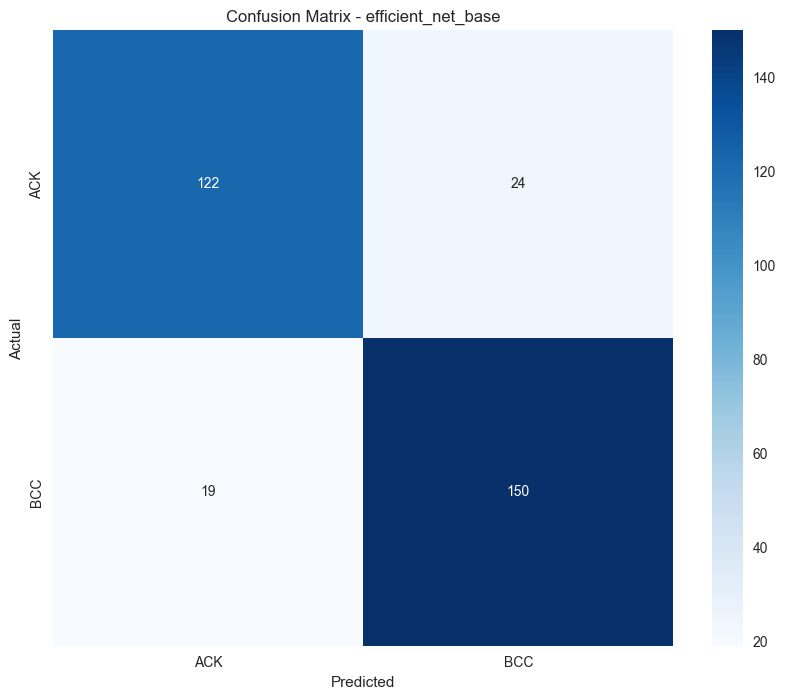

              precision    recall  f1-score   support

         ACK     0.8652    0.8356    0.8502       146
         BCC     0.8621    0.8876    0.8746       169

    accuracy                         0.8635       315
   macro avg     0.8637    0.8616    0.8624       315
weighted avg     0.8635    0.8635    0.8633       315



In [45]:
best_model_name = model_name
best_results = results[best_model_name]
y_true = best_results['targets']
y_pred = best_results['predictions']

# Plot confusion matrix
cm = plot_confusion_matrix(
    y_true, y_pred, 
    class_names=config['class_names'],
    title=f'Confusion Matrix - {best_model_name}'
)

# Print detailed classification report
report = classification_report(y_true, y_pred, target_names=config['class_names'], digits=4)
print(report)


Efficient Net really seems to be performing better!!